In [1]:
import sys
sys.path.append('/opt/render/neural/ssd')

import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import imread
import tensorflow as tf

from ssd import SSD
from ssd_utils import BBoxUtility

%matplotlib inline
# plt.rcParams['figure.figsize'] = (8, 8)
# plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.45
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
NUM_CLASSES = len(voc_classes) + 1

In [3]:
input_shape=(300, 300, 3)
model = SSD(input_shape, num_classes=NUM_CLASSES)
model.load_weights('./../weights/weights_300x300.hdf5', by_name=True)
bbox_util = BBoxUtility(NUM_CLASSES)

In [4]:
import glob
from natsort import natsorted, ns

path = '/home/rustam/images/test/'+'*.png'  

#Получаем список файлов в переменную videos 
files = glob.glob(path)
files = natsorted(files, alg=ns.IGNORECASE)

print len(files)
    
inputs = []
images = []

for row in files[:20]:
    print row    
    img_path = row
    img = image.load_img(img_path, target_size=(300, 300))
    img = image.img_to_array(img)
    images.append(imread(img_path))
    inputs.append(img.copy())

inputs = preprocess_input(np.array(inputs))
inputs.shape

120
/home/rustam/images/test/img001.png
/home/rustam/images/test/img002.png
/home/rustam/images/test/img003.png
/home/rustam/images/test/img004.png
/home/rustam/images/test/img005.png
/home/rustam/images/test/img006.png
/home/rustam/images/test/img007.png
/home/rustam/images/test/img008.png
/home/rustam/images/test/img009.png
/home/rustam/images/test/img010.png
/home/rustam/images/test/img011.png
/home/rustam/images/test/img012.png
/home/rustam/images/test/img013.png
/home/rustam/images/test/img014.png
/home/rustam/images/test/img015.png
/home/rustam/images/test/img016.png
/home/rustam/images/test/img017.png
/home/rustam/images/test/img018.png
/home/rustam/images/test/img019.png
/home/rustam/images/test/img020.png


(20, 300, 300, 3)

In [5]:
preds = model.predict(inputs, batch_size=1, verbose=1)

20/20 [==============================] - 17s    


In [6]:
%%time
results = bbox_util.detection_out(preds)

In [7]:
# %%time
# a = model.predict(inputs, batch_size=1)
# b = bbox_util.detection_out(preds)

/home/rustam/images/test/img001.png


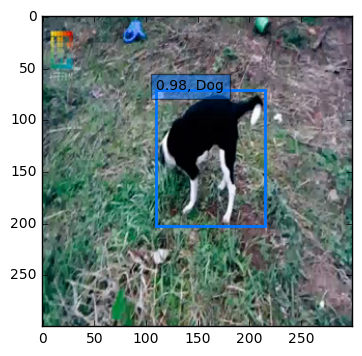

/home/rustam/images/test/img002.png


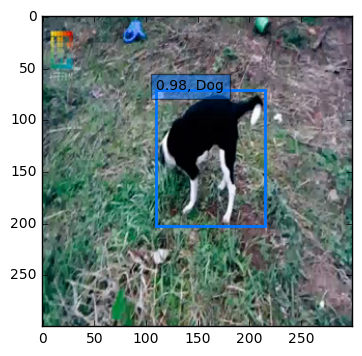

/home/rustam/images/test/img003.png


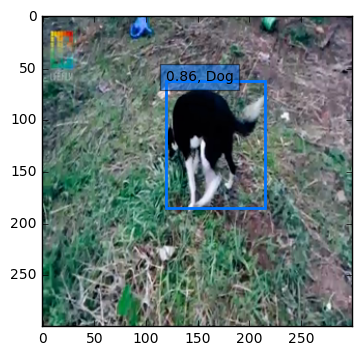

/home/rustam/images/test/img004.png


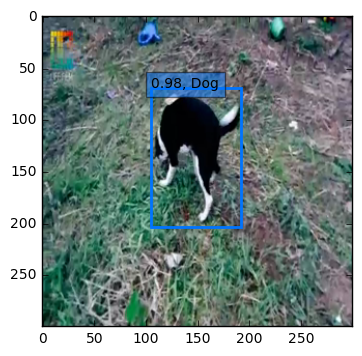

/home/rustam/images/test/img005.png


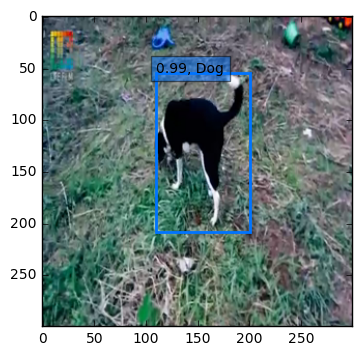

/home/rustam/images/test/img006.png


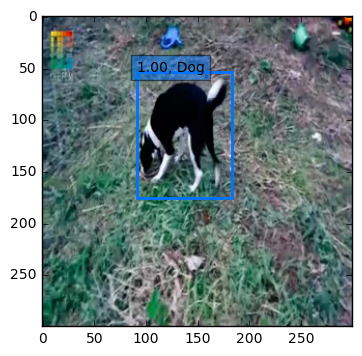

/home/rustam/images/test/img007.png


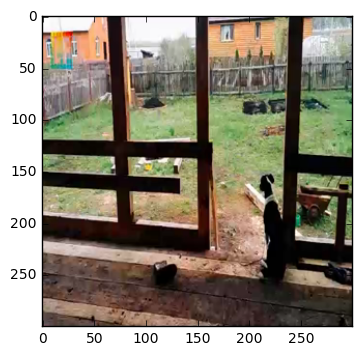

/home/rustam/images/test/img008.png


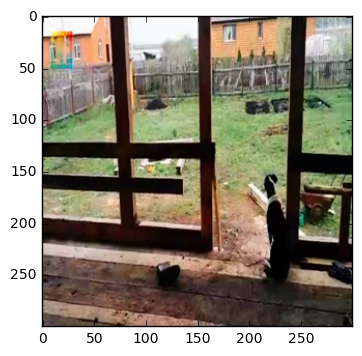

/home/rustam/images/test/img009.png


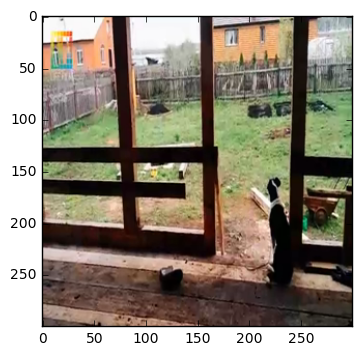

/home/rustam/images/test/img010.png


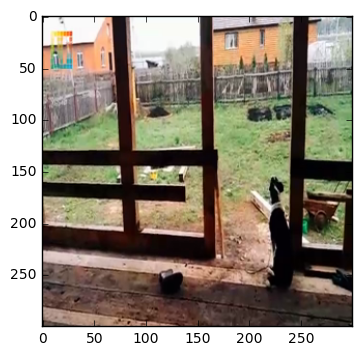

/home/rustam/images/test/img011.png


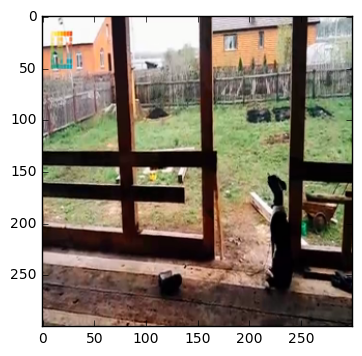

/home/rustam/images/test/img012.png


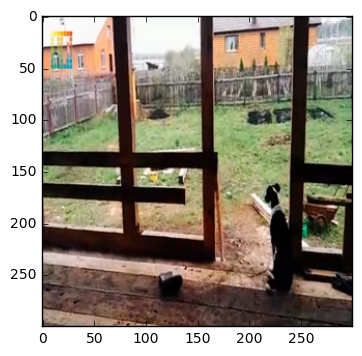

/home/rustam/images/test/img013.png


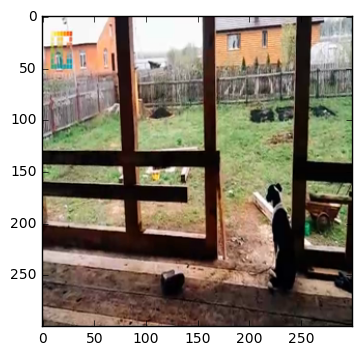

/home/rustam/images/test/img014.png


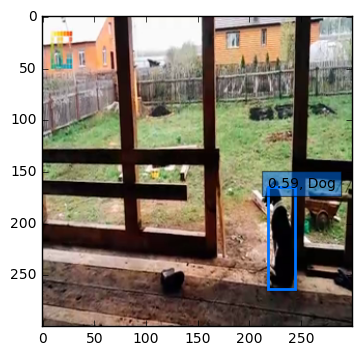

/home/rustam/images/test/img015.png


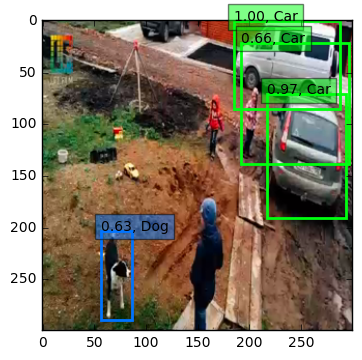

/home/rustam/images/test/img016.png


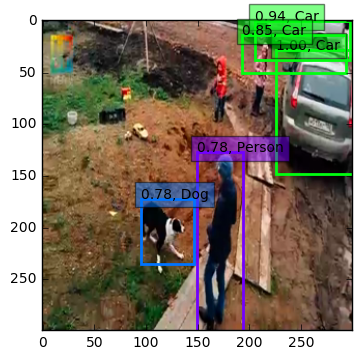

/home/rustam/images/test/img017.png


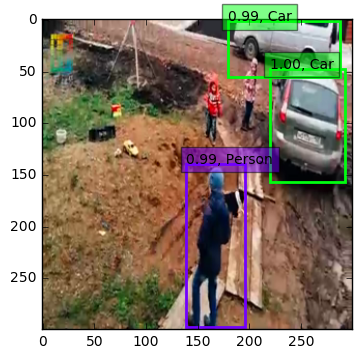

/home/rustam/images/test/img018.png


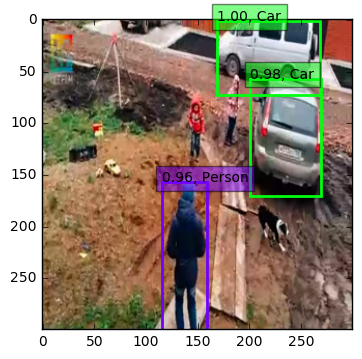

/home/rustam/images/test/img019.png


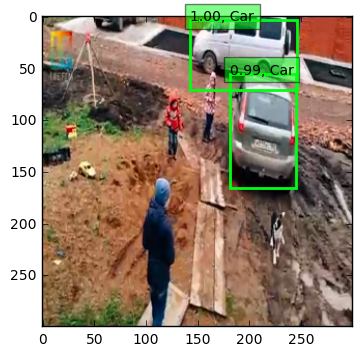

/home/rustam/images/test/img020.png


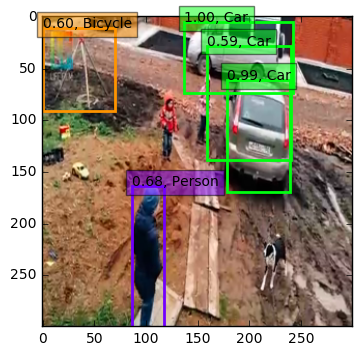

In [8]:
for i, img in enumerate(images):
    print files[i]
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.5]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()